---

В этом задании нам предстоит проанализировать набор данных [Weather in Szeged 2006-2016](https://www.kaggle.com/budincsevity/szeged-weather), содержащий информацию о погоде. В качестве зависимой переменной возьмём температуру воздуха в градусах Цельсия (`Temperature (C)`).

Наша цель состоит в том, чтобы построить две линейные регрессионные модели: объясняющую и предиктивную. Объясняющая модель должна быть пригодна для статистической интерпретации зависимостей, то есть показывать, какие факторы влияют на температуру воздуха, каким образом и какое возможное объяснение этого влияния можно привести. Предиктивная модель может быть совершенно ужасной с точки зрения статистики (например, все коэффициенты могут быть не значимы), но она должна давать хорошие прогнозы в соответствии с некоторой метрикой.

Хотя приведённые данные имеют формат временных рядов, мы будем игнорировать это и рассматривать их как обычные кросс-секционные данные (то есть как независимые наблюдения в пространстве).

### Часть 1: Предобработка данных (2 балла)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.** Загрузите данные из файла `weatherHistory.csv`. Выведите первые 5 строк таблицы.

In [2]:
df = pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


**Задание 2.** Изучите статью о том, что такое [apparent temperature](https://www.kxan.com/weather/difference-between-temperature-and-feels-like-temperature/) (также называемая "feels-like temperature" и "heat index"). Удалите какую-то переменную из набора данных и поясните, почему вы её удалили (помните о том, какая переменная будет целевой). Также удалите переменные:
- `Formatted Date` (потому что договорились, что не обращаем внимания на даты).
- `Daily Summary` (будем использовать просто `Summary`). 

In [3]:
df = df.drop(columns=['Apparent Temperature (C)', 'Formatted Date', 'Daily Summary'])
df.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,0.0,1016.51


Я удалил переменную Apparent Temperature (C), так как она формируется на основе температуры и влажности, то есть напрямую зависит от этих двух показателей. При условии, что мы будем строить модель с зависимой перменной температура, учитывать в модели параметр, который является зависым от нашей зависимой переменой, будет ошибкой.

**Задание 3.** Есть ли в наборе данных пропущенные значения? Если да, удалите их.

In [4]:
df.isnull().sum() # есть 517 пропущенных зачений в переменной Precip Type

Summary                     0
Precip Type               517
Temperature (C)             0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

In [5]:
df = df.dropna()
df.isnull().sum()

Summary                   0
Precip Type               0
Temperature (C)           0
Humidity                  0
Wind Speed (km/h)         0
Wind Bearing (degrees)    0
Visibility (km)           0
Loud Cover                0
Pressure (millibars)      0
dtype: int64

**Задание 4.** В данных есть одна числовая переменная, которая не несёт информации для предсказания целевой переменной. Найдите эту переменную, поясните ваш выбор и удалите её. 

In [6]:
df['Loud Cover'].unique()

array([0.])

In [7]:
df = df.drop(columns='Loud Cover')
df.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51


Я удалил переменную странную Loud Cover, отражающую непонятно что и имеющее всего 1 уникальное значение во всей выборке - 0. Для модели она абсолютно бесполезная, так как имеет одинаковое значение во всех наблюдениях.

**Задание 5.** Постройте диаграммы рассеяния всех числовых переменных против целевой (для этого используйте какой-то метод из `seaborn`). Есть ли переменные, для которых наблюдается очевидная нелинейная зависимость?

**Подсказка:** это пригодится для частей 2 и 3.

<AxesSubplot:xlabel='Humidity', ylabel='Temperature (C)'>

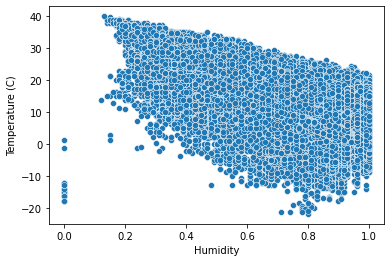

In [8]:
sns.scatterplot(x = 'Humidity', y = 'Temperature (C)', data=df)

<AxesSubplot:xlabel='Wind Speed (km/h)', ylabel='Temperature (C)'>

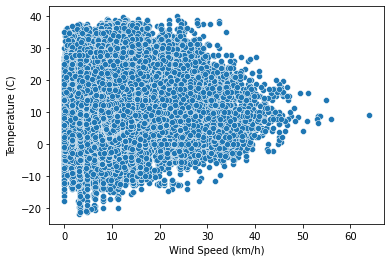

In [9]:
sns.scatterplot(x = 'Wind Speed (km/h)', y = 'Temperature (C)', data=df)

<AxesSubplot:xlabel='Wind Bearing (degrees)', ylabel='Temperature (C)'>

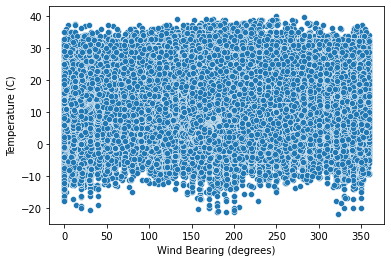

In [10]:
sns.scatterplot(x = 'Wind Bearing (degrees)', y = 'Temperature (C)', data=df)

<AxesSubplot:xlabel='Visibility (km)', ylabel='Temperature (C)'>

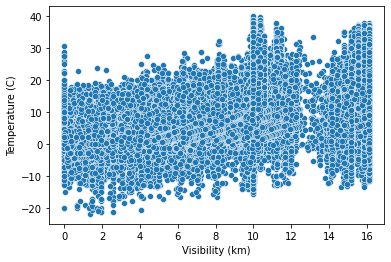

In [11]:
sns.scatterplot(x = 'Visibility (km)', y = 'Temperature (C)', data=df)

<AxesSubplot:xlabel='Pressure (millibars)', ylabel='Temperature (C)'>

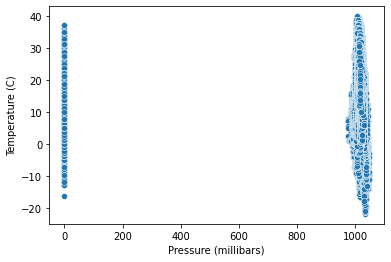

In [12]:
sns.scatterplot(x = 'Pressure (millibars)', y = 'Temperature (C)', data=df)

Очевидная нелинейная зависимость наблюдается у переменной Pressure, имеющая очень странный график рассеивания против целевой. Тяжело сказать про пермеменную Wind Bearing, так как у неё точки разбросаны практически по всей области гарфика рассеивания, но с учётом волнообразного распределения снизу графика, скорее всего здесь представлена нелинейная зависимость.

**Задание 6.** Преобразуйте категориальные переменные при помощи One Hot Encoding (то есть переведите их в дамми-переменные).

In [13]:
df = pd.get_dummies(df)
df.head()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Breezy,Summary_Breezy and Dry,Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,...,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy,Precip Type_rain,Precip Type_snow
0,9.472222,0.89,14.1197,251.0,15.8263,1015.13,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,9.355556,0.86,14.2646,259.0,15.8263,1015.63,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,8.288889,0.83,14.1036,269.0,15.8263,1016.41,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,8.755556,0.83,11.0446,259.0,15.8263,1016.51,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


**Задание 7.** Выведите корреляционную матрицу переменных. Какие переменные лучше всего коррелируют с целевой (назовите три)? 

**Подсказка:** это пригодится для частей 2 и 3.

<AxesSubplot:>

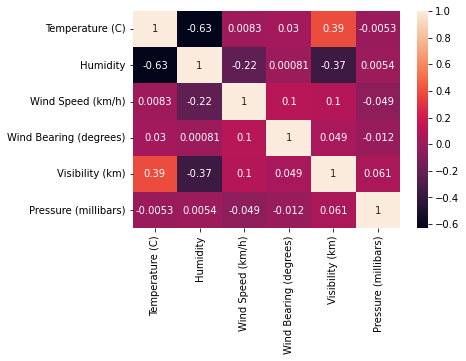

In [14]:
sns.heatmap(df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']].corr(), annot=True)

Лучше всего с целевой переменной коррелируют Humidity (однако с отрицательным коэффициентом - -0,63), Visability (0,39) и Wind Bearing (0,03).

**Задание 8.** Разделите данные на регрессоры (`X`) и целевую переменную (`y`). Если всё сделано правильно, то `X` и `y` должны иметь размеры, указанные ниже.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95936 entries, 0 to 96452
Data columns (total 35 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Temperature (C)                              95936 non-null  float64
 1   Humidity                                     95936 non-null  float64
 2   Wind Speed (km/h)                            95936 non-null  float64
 3   Wind Bearing (degrees)                       95936 non-null  float64
 4   Visibility (km)                              95936 non-null  float64
 5   Pressure (millibars)                         95936 non-null  float64
 6   Summary_Breezy                               95936 non-null  uint8  
 7   Summary_Breezy and Dry                       95936 non-null  uint8  
 8   Summary_Breezy and Foggy                     95936 non-null  uint8  
 9   Summary_Breezy and Mostly Cloudy             95936 non-null  uint8  
 10

In [16]:
X = df[['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
     'Summary_Breezy', 'Summary_Breezy and Dry', 'Summary_Breezy and Foggy', 'Summary_Breezy and Mostly Cloudy', 
    'Summary_Breezy and Overcast', 'Summary_Breezy and Partly Cloudy', 'Summary_Clear',
    'Summary_Dangerously Windy and Partly Cloudy', 'Summary_Drizzle', 'Summary_Dry', 'Summary_Dry and Mostly Cloudy',
    'Summary_Dry and Partly Cloudy', 'Summary_Foggy', 'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast',
    'Summary_Humid and Partly Cloudy', 'Summary_Light Rain', 'Summary_Mostly Cloudy', 'Summary_Overcast', 'Summary_Partly Cloudy',
    'Summary_Rain', 'Summary_Windy', 'Summary_Windy and Dry', 'Summary_Windy and Foggy', 'Summary_Windy and Mostly Cloudy',
    'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy', 'Precip Type_rain', 'Precip Type_snow']]

y = df['Temperature (C)']

print('X:', X.shape)
print('y:', y.shape)

X: (95936, 34)
y: (95936,)


**Задание 8.** Похоже ли распределение целевой переменной на нормальное? Поясните, почему важно, чтобы распределение `y` было похоже на нормальное.

array([[<AxesSubplot:title={'center':'Temperature (C)'}>]], dtype=object)

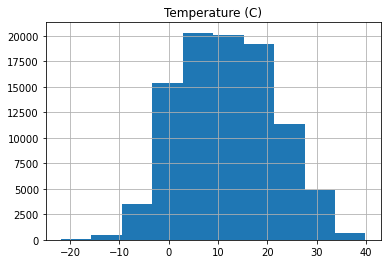

In [94]:
y.hist()

Распделение Y, как видно на графике, не является нормальным, однако похоже на него.

Нам важно, чтобы распределение Y было похоже на нормальное, так как нормальность необходима для подтверждения верного выбора модели решения задачи и оценки.

### Часть 2: Построение объясняющей модели (4 балла)

**Задание 9.** На основании предыдущего анализа и логических соображений выберите шесть регрессоров (не считая константный), которые будут включены в объясняющую модель. Помните, что когда мы строим объясняющую модель, выбор переменных должнен быть обоснован (не достаточно использовать предыдущий анализ, выбор каждой переменной должен иметь теоретическое или логическое обоснование). В качестве регрессоров можно брать переменные из `X` или преобразования над ними (`Humidity` и `Humidity`$^2$ будем считать разными регрессорами). 

Создайте ячейку Markdown ниже и запишите в неё функциональный вид модели, которую вы будете оценивать. Поясните выбор регрессоров (не нужно углубляться в физику поведения жидкостей и ссылаться на уравнения Навье-Стокса, достаточно понятной научно-популярной интерпретации) и, если используете, выбор нелинейных преобразований над ними.

**Пример ответа:** я строю модель

$$
y_i = \beta_0 + \beta_1 Humidity + \beta_2 Humidity^2 + \beta_3 Humidity^3 + \beta_4 Visibility (km) + \beta_5 Visibility (km) ^ 2 + \beta_6 Summary\_Breezy + \varepsilon_i
$$

Обоснование выбора переменных:
- $Humidity$ – потому что мне кажется, что влажность воздуха влияет на температуру <так-то и так-то>.
- $Humidity^2$ – потому что ...
- ...

# Ответ:

 я строю модель

$$
y_i = \beta_0 + \beta_1 Humidity + \beta_2 Wind Speed + \beta_3 Wind Bearing + \beta_4 Wind Bearing^2 + \beta_5 Summary_Mostly Cloudy + \beta_6 Visibility + \varepsilon_i
$$


$Humidity$ - потому что мне кажется, что влажность воздуха влияет на температуру, так от температуры зависит, сколько молекул воды может удержать воздух (соответственно если влажность большая - температуры недостаточно, чтобы удержать молекулы воды)

$Wind Speed$ - потому что ветер приносит с собой циклоны и антициклоны, сильно влияющие на температуру

$Wind Bearing$ (degrees) - потому что направление ветра влияет на погоду тем, что определяет приближение или прохождение атмосферного фронта, который является признаком ухудшения погоды

$Wind Bearing^2$ - так как выше описано, почему направление ветра влияет на погоду, при этом в анализе выше мы выяснили, что этот показатель нелинейно влияет на температуру.

$Summary_Mostly Cloudy$ - так как основное нагревание воздуха просходит выделением тепла земной поверхности, а большая облачность препятствует нагреву земной поверхности

$Visibility$ - так как видимость - это характерстика прозранчости атмосферы, а чем меньше прозрачность, тем тяжелее соленчным лучам проникать через атмосферу, соотвественно нагрев поверхности происходит меньше.



**Задание 10.** Выделите выбранные признаки в переменную `X1`. 

In [17]:
for i in df['Wind Bearing (degrees)']:
    df['Wind Bearing (degrees)_sq']=df['Wind Bearing (degrees)']**2 #для начала создадим переменную 𝑊𝑖𝑛𝑑𝐵𝑒𝑎𝑟𝑖𝑛𝑔^2

In [18]:
X1 = df[['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Wind Bearing (degrees)_sq', 'Summary_Mostly Cloudy']]
X1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95936 entries, 0 to 96452
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Humidity                   95936 non-null  float64
 1   Wind Speed (km/h)          95936 non-null  float64
 2   Wind Bearing (degrees)     95936 non-null  float64
 3   Visibility (km)            95936 non-null  float64
 4   Wind Bearing (degrees)_sq  95936 non-null  float64
 5   Summary_Mostly Cloudy      95936 non-null  uint8  
dtypes: float64(5), uint8(1)
memory usage: 4.5 MB


**Задание 11.** Оцените модель при помощи МНК (минимзации MSE). Прокомментируйте значимость коэффициентов.

In [19]:
dff=df
dff['Humidity']=df['Humidity']
dff['WindSpeed']=df['Wind Speed (km/h)']
dff['WindBearing']=df['Wind Bearing (degrees)']
dff['WindBearing_sq']=df['Wind Bearing (degrees)_sq']
dff['Visibility']=df['Visibility (km)']
dff['Summary_MostlyCloudy']=df['Summary_Mostly Cloudy']
dff['Temp']=df['Temperature (C)']

In [21]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Temp ~ Humidity + WindSpeed + WindBearing + WindBearing_sq + Visibility + Summary_MostlyCloudy ', data=dff).fit()
lm.summary() #уровень значимости везде берём за 5%

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                 1.310e+04
Date:                Sat, 11 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:24:50   Log-Likelihood:            -3.2411e+05
No. Observations:               95936   AIC:                         6.482e+05
Df Residuals:                   95929   BIC:                         6.483e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               30.6279      0.152    201.927      0.000      30.331      30.925
Humidity               -29.1891      0.129   -226.578      0.000     -29.442     -28.937
WindSpeed               -0.2059      0.003    -60.190      0.000      -0.213      -0.199
WindBearing              0.0019      0.001      2.317      0.021       0.000       0.003
WindBearing_sq        3.891e-06   2.17e-06      1.796      0.073   -3.56e-07    8.14e-06
Visibility               0.4221      0.006     70.844      0.000       0.410       0.434
Summary_MostlyCloudy     0.2779      0.051      5.453      0.000       0.178       0.378
==============================================================================
Omnibus:                     3387.308   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.151
Skew:                          -0.461   Prob(JB):                         0.00
Kurtosis:                       3.312   Cond. No.                     5.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Ответ:**

Для начала отметим, что модель статистически значима (p-value F-статистики = 0.00), поэтому все дальнейшие рассуждения имеют смысл

4 переменных из Х1 (Humidity, WindSpeed, Visibility, Summary_MostlyCloudy) имеют p-value 0.000, то есть очевидно являются статистически значимыми для модели.

Далее WindBearing имеет p-value 0.021, что меньше 0.05, поэтому на уровне значимости 5% также является статистически значимым для модели.

А вот WindBearing_sq имеет p-value 0.073, что превышает 0.05, тогда на уровне значимости 5% эта переменная является статистически не значимой для модели.

**Задание 12.** Поясните, как каждый регрессор влияет на зависимую переменную 
1. математически ("при увеличении $X$ на 1 $Y$ увеличивается на 3") и 
2. содержательно ("$X$ влияет на $Y$ положительно, потому что...", "$X$ не оказывает влияния на $Y$, потому что...").

**Ответ**

1) Humidity. X влияет на Y отрицательно, потому что при увеличении X на 1 Y уменьшается на 29.1891 (то есть при увеличения показателя влажности на 5%, температура уменьшается на 1,46 градусов)

2) WindSpeed. X влияет на Y отрицательно, потому что при увеличении X на 1 Y уменьшается на 0.2059 (при увеличении скорости ветра на 5 км/ч температура уменьшается на 1 градус)

3) WindBearing. X влияет на Y положительно, при увеличении X на 1 Y увеличивается на 0.0019 (при изменении направления ветра на 10 градусов, температура слегка увеличивается на 0,02 градуса) 

4) WindBearing_sq. X не влияет на Y, так как коэфициент оказался слишком маленьким, а связь статистически незначима

5) Visibility. X положительно влияет на Y, при увеличении X на 1 Y увеличивается на 0.4221 (при уменьшении видимости на 2км температура падает почти на 1 градус)

6) Summary_MostlyCloudy. X положительно влияет на Y, при увеличении X на 1 Y увеличивается на 0.2279 (если облачность меняется на преимущественно облачно, температура растёт на 0.2279 градусов)

**Задание 13.** Рассчитайте $R^2$ и MSE на выборке `X1`. Прокомментируйте качество подгонки регрессии.

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [38]:
y_pred_naive = np.ones(len(y)) * np.mean(y) # для начала сделаем навиный прогноз, чтобы было с чем сравнивать MSE
mse(y, y_pred_naive)

91.59678175559762

In [39]:
model = LinearRegression() # а теперь используем для предсказания линейную регрессию
model.fit(X1, y)
y_pred = model.predict(X1)

print(r2_score(y, y_pred))
print(mse(y, y_pred))

0.45036554902349013
50.344746851453095


R-квадрат оказался равен 0.45. Нормированный R-квадрат также равен 0.450. Это говорит о средней силы связи в модели. 45% дисперсии результирующего признака объясняется изменениями в переменных, относящихся к X. Возможно, при выборе других регрессоров получилась бы модель, обеспечивающая лучшее соответствие данным, но это уже совершенно другая история.

MSE на выборке Х1 оказалось равным 50.34, что практически в 2 раза меньше, чем при навином прогнозе, значит качество подгонки оказалось гораздо лучше, чем при наивном прогнозе.

### Часть 3: Построение предсказательной модели (4 балла)

В предыдущей части мы хотели объяснить $y$ при помощи каких-то регрессоров, которые мы отбирали из теоретико-логических соображений. Теперь поставим другую задачу: мы не хотим ничего объяснять, а хотим только хорошо предсказывать $y$ по новым наблюдениям. Код ниже поделит выборку (`X`, `y`) на обучающую (`X_train`, `y_train`), на которой будем *оценивать* модель, и *тестовую* (`X_test`, `y_test`), на которой будем предсказывать. 

In [40]:
from sklearn.model_selection import train_test_split

np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

**Задание 14.** Сохраните в переменные `X_train_1` и `X_test_1` те же признаки из `X_train` и `X_test` соответственно, что и в `X1` (то есть те, которые вы выбрали в задании 9).

Оцените модель на выборке `X_train_1`. Сделайте предсказания на выборках `X_train_1` (то есть обучающей) и `X_test_1` (то есть тестовой). Рассчитайте `MAE` на этих выборках.

In [41]:
X_train_1, X_test_1, y_train, y_test = train_test_split(X1, y, test_size = 0.3)

In [42]:
from sklearn.metrics import mean_absolute_error as mae

model1 = LinearRegression()
model1.fit(X_train_1, y_train)
y_train_pred = model1.predict(X_train_1)
print('Для X_train_1:')
print('R^2 =', r2_score(y_train, y_train_pred))
print('MSE =', mse(y_train, y_train_pred))
print('Предсказания: ', y_train_pred[:5])
print('MAE =', mae(y_train, y_train_pred))


Для X_train_1:
R^2 = 0.44953775429405063
MSE = 50.3196333801853
Предсказания:  [13.67469547 21.13217512 10.75092988  3.73717615 14.30226759]
MAE = 5.711952933806657


R-квадрат оказался равен 0.4505, что на 0.002 превышает значение R-квадрата для обычной модели X1 (из задания 13), то есть новая модель ненмого (совсем незначительно)лучше объясняет изменения в зависимой переменной. При этом MSE увеличился на ~0.03, то есть качество модели стало немного хуже.

In [43]:
model2 = LinearRegression()
model2.fit(X_test_1, y_test)
y_test_pred = model1.predict(X_test_1)
print('Для X_test_1:')
print('Предсказания: ', y_test_pred[:5])
print('MAE =', mae(y_test, y_test_pred))

Для X_test_1:
Предсказания:  [22.10699807 13.66529946  2.23703912  2.27283385  4.42585575]
MAE = 5.718237801292417


**Задание 15.** Теперь сохраните в переменные `X_train_2` и `X_test_2` те же признаки из `X_train` и `X_test` соответственно, что и в `X1` (то есть те, которые вы выбрали в задании 9) и ещё какие-то признаки (количество выберите на ваш вкус, главное, чтобы всего признаков было больше, чем в `X1`). Оцените модель на выборке `X_train_2`. Сделайте предсказания на выборках `X_train_2` (то есть обучающей) и `X_test_2` (то есть тестовой). Рассчитайте `MAE` на этих выборках. Удалось ли повысить качество на обучающей выборке? А на тестовой? Поясните. 

In [44]:
X2 = df[['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Wind Bearing (degrees)_sq', 
         'Summary_Mostly Cloudy', 'Pressure (millibars)', 'Precip Type_snow', 'Summary_Clear']]

X_train_2, X_test_2, y_train, y_test = train_test_split(X2, y, test_size = 0.3)

In [45]:
modelx2 = LinearRegression()
modelx2.fit(X_train_2, y_train)
y_train2_pred = modelx2.predict(X_train_2)
print('Для X_train_2:')
print('R^2 =', r2_score(y_train, y_train2_pred))
print('MSE =', mse(y_train, y_train2_pred))
print('Предсказания: ', y_train2_pred[:5])
print('MAE =', mae(y_train, y_train_pred))


Для X_train_2:
R^2 = 0.612129186610502
MSE = 35.59871915197715
Предсказания:  [ 7.35908089  8.81306974  9.51159949 19.01002831 11.52327015]
MAE = 9.33952558448303


R-квадрат для выборки с Х2 вырос на 0.16 относительно прошлой выборки с Х1. То есть новая выборка значительно лучше объясняет разброс, это очень хорошо.

Значение MSE уменьшилось практически на 15 единиц и стало равно 35.7, значит качество этой выборки стало гораздо лучше.

Значение MAE увеличилось практически на 4 единицы и стало равно 9.39, что говорит, наоборот, о понижении качества выборки.

В таком случае, мы можем сказать, что в нашей выборке стало гораздо меньше грубых ошибок (т.к. они сильно влияют на показатель MSE, который возводит их в квадарт), что естественно хорошо. При этом в MAE каждая ошибка вносит вклад относительно абсолютному значению ошибки. Исходя из этих фактов мы можем сказать, что, скорее всего, ошибок стало больше, но они стали гораздо менее грубыми. 

In [46]:
modelx2_2 = LinearRegression()
modelx2_2.fit(X_test_2, y_test)
y_test2_pred = modelx2_2.predict(X_test_2)
print('Для X_test_2:')
print('Предсказания: ', y_test_pred[:5])
print('MAE =', mae(y_test, y_test2_pred))

Для X_test_2:
Предсказания:  [22.10699807 13.66529946  2.23703912  2.27283385  4.42585575]
MAE = 4.921817729431481


Для тестовой выборки мы расчитывали только MAE, этот показатель в модели Х2 уменьшился на 0.8 относительно модели Х1 и стал равен 4.9. Качество модели, очевидно, стало лучше, так как количество и/или сила ошибок стали меньше.

**Задание 16.** Прокомментируйте значимость коэффициентов модели, оценённой на `X_train_2`

In [57]:
X_train_2n=X_train_2
X_train_2n['WindSpeed']=X_train_2['Wind Speed (km/h)']
X_train_2n['WindBearing']=X_train_2['Wind Bearing (degrees)']
X_train_2n['Visibility']=X_train_2['Visibility (km)']
X_train_2n['WindBearing_sq']=X_train_2['Wind Bearing (degrees)_sq']
X_train_2n['Summary_MostlyCloudy']=X_train_2['Summary_Mostly Cloudy']
X_train_2n['Pressure']=X_train_2['Pressure (millibars)']
X_train_2n['PrecipType_snow']=X_train_2['Precip Type_snow']
X_train_2n['Temp']=y_train

In [56]:
lm1 = smf.ols(formula='Temp ~ Humidity + WindSpeed + WindBearing + WindBearing_sq + Visibility + Summary_MostlyCloudy + Pressure + PrecipType_snow + Summary_Clear', data=X_train_2n).fit()
lm1.summary() #уровень значимости везде берём за 5%

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                 1.177e+04
Date:                Sat, 11 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:47:18   Log-Likelihood:            -2.1524e+05
No. Observations:               67155   AIC:                         4.305e+05
Df Residuals:                   67145   BIC:                         4.306e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               34.5284      0.250    138.003      0.000      34.038      35.019
Humidity               -26.4787      0.130   -203.214      0.000     -26.734     -26.223
WindSpeed               -0.2160      0.003    -62.104      0.000      -0.223      -0.209
WindBearing             -0.0016      0.001     -1.983      0.047      -0.003   -1.84e-05
WindBearing_sq        1.039e-05   2.18e-06      4.764      0.000    6.11e-06    1.47e-05
Visibility               0.1840      0.006     29.309      0.000       0.172       0.196
Summary_MostlyCloudy    -0.2901      0.053     -5.494      0.000      -0.394      -0.187
Pressure                -0.0012      0.000     -6.102      0.000      -0.002      -0.001
PrecipType_snow        -12.8734      0.078   -165.196      0.000     -13.026     -12.721
Summary_Clear           -0.9344      0.077    -12.079      0.000      -1.086      -0.783
==============================================================================
Omnibus:                      845.214   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              837.504
Skew:                          -0.253   Prob(JB):                    1.37e-182
Kurtosis:                       2.793   Cond. No.                     6.93e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

P-value для значимости модели (F-статистики) равен 0.00, значит модель значима и все дальнейшие рассуждения имеют смысл

P-value для значимости независимых переменных (t-статистики этих перменных) для всех коэффициентов, кроме WindBearing оказалось равно 0.000, значит очевидно эти коэффициенты значимы для модели на любом разумном уровне значимости.

Для переменной WindBearing этот показатель оказался равным 0.047, что меньше, чем 0.05. Значит на нашем уровне значимости 5% и эта переменная является значимой для модели.

Таким образом, абсолютно все коэффициенты для модели, оцененной на X_train_2 являются значимыми.

**Задание 17.** Будем называть модель, оценённую на `X_train_1`, **объясняющей**, а на `X_train_2` – **предсказательной**. На основании заданий 14 и 15 сделайте вывод, подходит ли объясняющая модель для предсказаний. На основании задания 16 сделайте вывод, подходит ли предсказательная модель для объяснительной интерпретации. 

Объясняющая модель X_train_1 не очень хорошо подходит для предсказаний, так как ее значение MSE значительно превосходит MSE предсказательной модели, что говорит нам о наличии критических ошибок в первой модели. Для предсказательной модели недопустимо наличие критических ошибок (наличие сильных отклонений в предсказаниях от правды, естественно, очень плохо)

При этом предсказательная модель X_train_2 достаточно хорошо подходит для объяснительной интерпретации, так как в этой модели абсолютно все коэффициенты оказались значимы